In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
# Presentation theme RGB: 246,112,49
# Microsoft colors: Green: 127,186,0; Blue: 0,164,239; Yellow: 255,185,0

In [208]:
movies_df = pd.read_pickle('./movies_df.pkl')

In [209]:
movies_df.head()

,imdb_id,title,release_date,genre,duration,director,budget,domestic_income,worldwide_income,imdb_user_score,...,Mystery,Animation,Drama,Western,War,History,domestic_roi,worldwide_roi,domestic_profit_loss,worldwide_profit_loss
0,tt0035423,Kate & Leopold,2002-04-05,"Comedy, Fantasy, Romance",118,James Mangold,48.0,47.1,76.0,330.0,...,0,0,0,0,0,0,98,158,-0.9,28.0
1,tt0083907,The Evil Dead,2018-10-31,Horror,85,Sam Raimi,0.3,2.4,2.9,802.0,...,0,0,0,0,0,0,686,827,2.0,2.5
2,tt0113026,The Fantasticks,2000-09-22,"Musical, Romance",86,Michael Ritchie,10.0,0.0,0.0,70.0,...,0,0,0,0,0,0,0,0,-10.0,-10.0
3,tt0118589,Glitter,2001-09-21,"Drama, Music, Romance",104,Vondie Curtis-Hall,22.0,4.3,5.3,314.0,...,0,0,1,0,0,0,19,24,-17.7,-16.7
4,tt0120188,Three Kings,2000-04-21,"Action, Adventure, Comedy",114,David O. Russell,75.0,60.7,107.8,563.0,...,0,0,0,0,0,0,81,144,-14.3,32.8


In [210]:
movies_df.describe()

,duration,budget,domestic_income,worldwide_income,imdb_user_score,metacritic_user_score,Sci-Fi,Crime,Musical,Adventure,...,Mystery,Animation,Drama,Western,War,History,domestic_roi,worldwide_roi,domestic_profit_loss,worldwide_profit_loss
count,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,...,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2.525000e+03,2525.000000,2525.000000
mean,103.897426,32.492792,45.246337,96.209228,287.381782,6.484271,0.057822,0.164356,0.010693,0.150891,...,0.077228,0.055050,0.534653,0.007921,0.009109,0.017426,473.281188,8.156345e+02,12.754257,63.717109
std,16.169595,44.652535,79.954127,205.705986,457.218237,1.386653,0.233452,0.370672,0.102873,0.358014,...,0.267005,0.228122,0.498896,0.088663,0.095024,0.130877,14328.828963,2.566890e+04,53.169677,172.146659
min,63.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-176.900000,-111.000000
25%,92.000000,4.000000,0.700000,1.200000,55.000000,5.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.400000e+01,-6.600000,-2.300000
50%,101.000000,17.000000,17.500000,25.400000,151.000000,6.484271,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,85.000000,1.460000e+02,-0.300000,4.700000
75%,113.000000,40.000000,53.700000,94.900000,324.000000,7.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,190.000000,3.350000e+02,17.800000,57.200000
max,219.000000,356.000000,936.700000,2797.800000,8302.000000,9.400000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,719459.000000,1.289039e+06,691.700000,2553.000000


In [211]:
unique_genres = set([x for genre in [genres.split(', ') for genres in movies_df['genre']] for x in genre])
genres = list(unique_genres)

In [212]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [213]:
wroi_noutlier_df = remove_outlier(movies_df, 'worldwide_roi')
avg_worldwide_roi_by_genre = []
for genre in genres:
    avg_worldwide_roi_by_genre.append(wroi_noutlier_df[wroi_noutlier_df[genre]==1].worldwide_roi.mean())

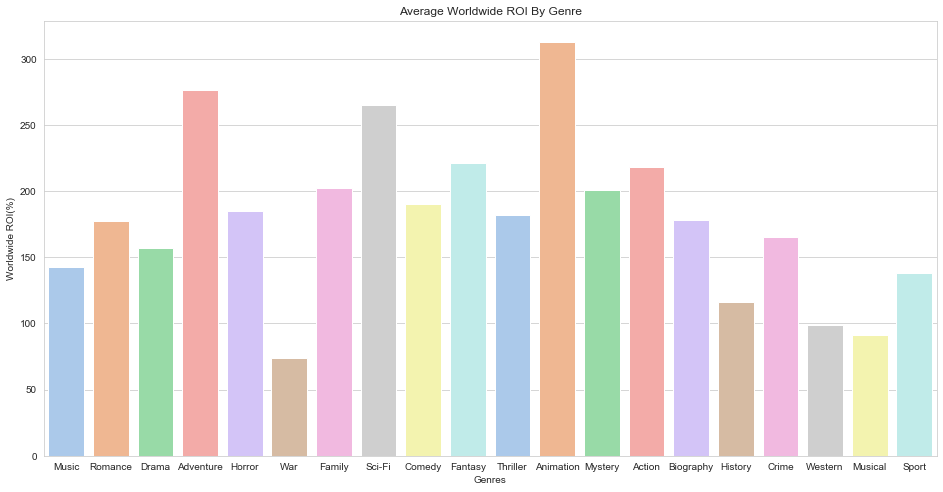

In [214]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,8))
wroi = sns.barplot(x=genres, y=avg_worldwide_roi_by_genre, palette='pastel')
plt.xlabel('Genres')
plt.ylabel('Worldwide ROI(%)')
plt.title("Average Worldwide ROI By Genre")

plt.show(wroi)

In [215]:
wpl_noutlier_df = remove_outlier(movies_df, 'worldwide_profit_loss')
avg_worldwide_pl_by_genre = []
for genre in genres:
    avg_worldwide_pl_by_genre.append(wpl_noutlier_df[wpl_noutlier_df[genre]==1].worldwide_profit_loss.mean())

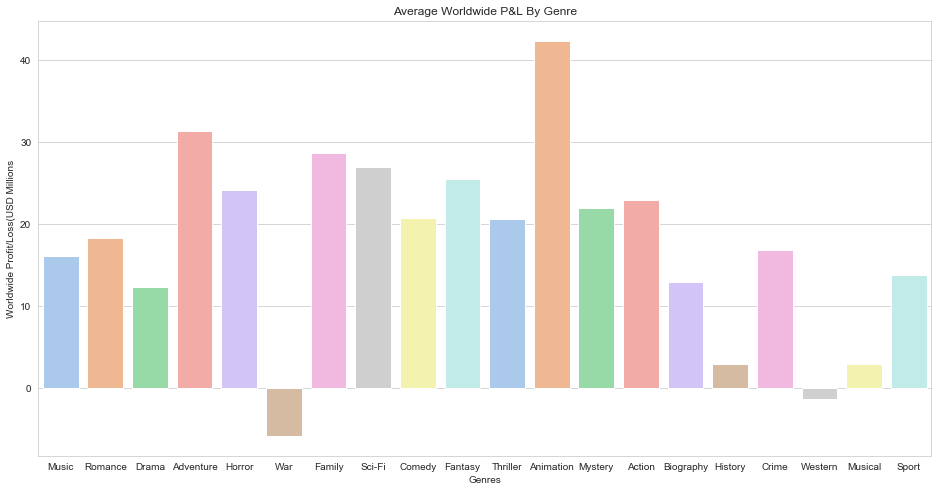

In [216]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,8))
wpl = sns.barplot(x=genres, y=avg_worldwide_pl_by_genre, palette='pastel')
plt.xlabel('Genres')
plt.ylabel('Worldwide Profit/Loss(USD Millions')
plt.title("Average Worldwide P&L By Genre")

plt.show(wpl)

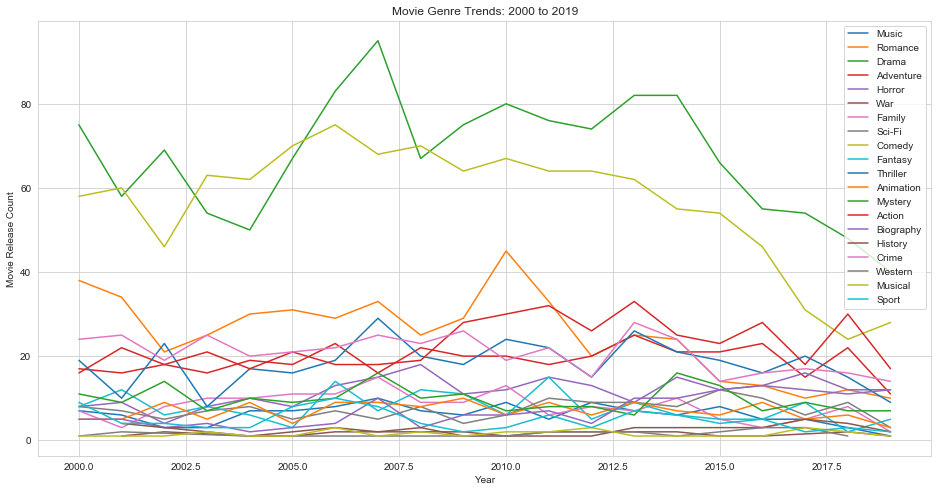

In [217]:
fig, ax = plt.subplots(figsize = (16,8))
for genre in genres:
    data = dict(movies_df[movies_df[genre]==1].release_date.dt.year.value_counts().sort_index())
    x = list(data.keys())
    y = list(data.values())
    ax.plot(x, y, label=genre)
ax.legend()
plt.xlabel('Year')
plt.ylabel('Movie Release Count')
plt.title('Movie Genre Trends: 2000 to 2019')
plt.show()

In [218]:
avg_imdb_score_by_genre = []
for genre in genres:
    avg_imdb_score_by_genre.append(movies_df[movies_df[genre]==1].imdb_user_score.mean())

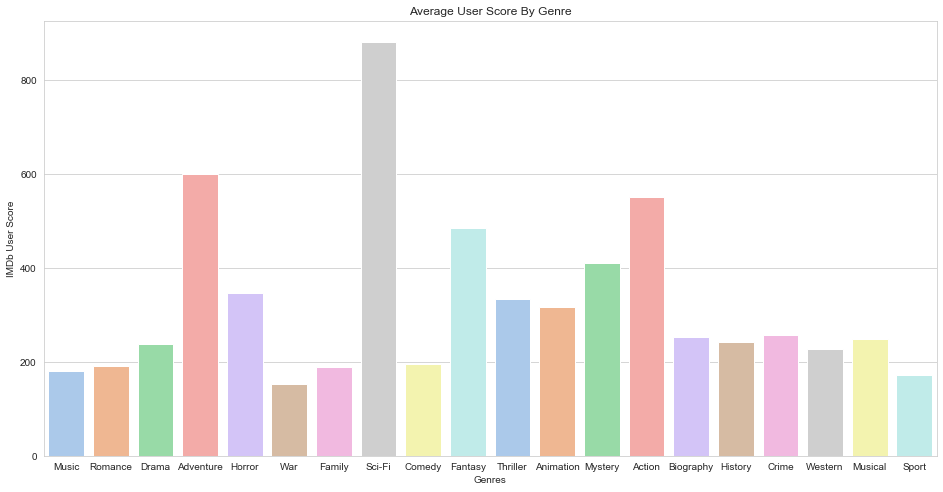

In [219]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,8))
ius = sns.barplot(x=genres, y=avg_imdb_score_by_genre, palette='pastel')
plt.xlabel('Genres')
plt.ylabel('IMDb User Score')
plt.title("Average User Score By Genre")

plt.show(ius)

# Correlations
There are several meaningful relationships found when correlating the dataset using the heatmap plot method.
* The Metacritic user score, calculated as an avg rating between 0 and 10, has no correlation with domestic or worldwide box office at all.
* The IMDB user score, however, is strongly correlated with box office performance. Their scoring method is weighted in favor of volume of ratings, as well as average score.
* Domestic and worldwide box office performance is strongly correlated with budget.

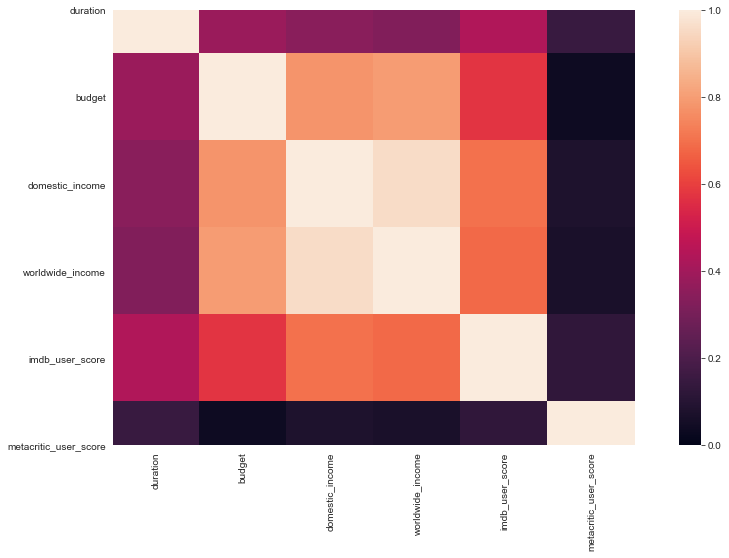

In [220]:
six_cols = list(movies_df.describe())[0:6]
plt.figure(figsize = (16,8))
sns.heatmap(movies_df[six_cols].corr(), square=True, vmin=0, vmax=1)
plt.yticks(rotation = 0)
plt.show()